In [69]:
#! usr/bin/env python3
import praw
import pandas as pd
import seaborn as sns
from pprint import pprint
from IPython import display
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# The following will create a Reddit instance using a praw API module
# different ways to organize: .hot, .new, .controversial, .top, and .gilded)

reddit = praw.Reddit(client_id='A0HZsCKBk-P50g', client_secret='9vAJO7D2uhGh-I7wpVNDI2JEwm0', user_agent='msds', username = 'baymsds',password = '2003@@PUujin')
posts = set()
for submission in reddit.subreddit('dogecoin').new(limit=1000):
    posts.add(submission.selftext)
    display.clear_output()

In [70]:
# The following code shows Vader's polairty score.

sia = SIA()
results = []
for line in posts:
    pol_score = sia.polarity_scores(line)
    pol_score['post'] = line
    results.append(pol_score)
pprint(results[:3], width=100)

[{'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'post': ''},
 {'compound': 0.3485,
  'neg': 0.077,
  'neu': 0.804,
  'pos': 0.119,
  'post': 'If the rich control this and repeat 3 to 10 cent pump and dumps, then how can this '
          'possibly get to $1 when they just need to repeat this process forever???'},
 {'compound': 0.802,
  'neg': 0.0,
  'neu': 0.791,
  'pos': 0.209,
  'post': 'Everyone (ok alot ) have hopes dogecoin with big moon and make lots of money. What '
          'would you do with yours ? Id love to hear it. \n'
          '\n'
          '\n'
          'I would buy a freeze dry machine and start a small business.'}]


In [46]:
# I saved the chunks of posts in csv format, then combined them manually.

df = pd.DataFrame.from_records(results)
df.head()
df.to_csv('dump.csv', mode='a', encoding='utf-8', index=False)

In [71]:
df = pd.read_csv('dump.csv')
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,post,label
0,0.000,0.917,0.083,0.4215,Is it possible that by the end of the year any...,1
1,0.037,0.850,0.113,0.6172,It is not fair that all the profit is destined...,1
2,0.048,0.710,0.243,0.9899,"I know I’m old, but I use PayPal for everythin...",1
3,0.046,0.767,0.186,0.9914,One of the challenges with real world transact...,1
4,0.000,0.851,0.149,0.8625,Here is an article from Joule (an energy resea...,1


In [72]:
# The following code cleans the data little bit then applies tokens. 

nltk.download('stopwords')
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
def process_text(posts):
    tokens = []
    for line in posts:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks) 
    return tokens
pos_lines = list(df[df.label == 1].post)
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enkhbayar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('dogecoin', 2484),
 ('doge', 1853),
 ('https', 1198),
 ('would', 1108),
 ('com', 1013),
 ('1', 860),
 ('like', 775),
 ('wallet', 672),
 ('help', 631),
 ('could', 583),
 ('get', 528),
 ('core', 504),
 ('time', 488),
 ('use', 485),
 ('one', 452),
 ('make', 450),
 ('people', 431),
 ('need', 424),
 ('also', 413),
 ('github', 409)]

In [73]:
# Printed results to do a quick visualizationn.

print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)

 1    1679
 0     506
-1     222
Name: label, dtype: int64
 1    69.754882
 0    21.022019
-1     9.223099
Name: label, dtype: float64


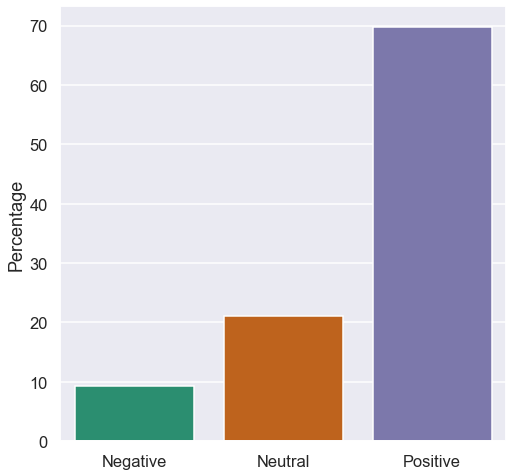

In [74]:
# Plotted the data on a graph to provide a better visualization.

fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()